<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# Problem Statement

***Facebook has become quite popular in the recent few years with people all over the world using it 
as a medium to share their status,thoughts and pictures with their friends. 
With the mobile app , it has become even more popular and easier to access. 
People from all age groups are connected to facebook, however there are certain differences 
in their way of using it such as with respect to initiating friendships and sending likes .
We are trying to study the dataset provided to identify certain patterns with respect to 
how the users are making use of this most popular social networking app depending on their age group,gender etc.***

<img src="Facebook1.png" align='left'><br/>   
[Dataset Link](https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv)

# EDA on Facebook Data (notebook1)

<img src="Facebook_cover.png" align='left'><br/>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4, color_codes=True)      # To apply seaborn styles to the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


## Description of the Dataset

**This dataset provides a usage analysis of various facebook users such as the tenure of their account,number of friends they have,number of friendships they have initiated , the number of likes received by them through the FB website and through the mobile app .**

|Column Name|Description| 
| :---      | :---      |
|userid | A numeric value uniquely identifying the user | 
|age | Age of the user in years | 
|dob_day | Day part of the user's date of birth | 
|dob_year | Year part of the user's date of birth | 
|dob_month | Month part of the user's date of birth | 
|gender | Gender of the user | 
|tenure | Number of days since the user has been on FB | 
|friend_count | Number of friends the user has | 
|friendships_initiated | Number of friendships initiated by the user | 
|likes | Total number of posts liked by the user | 
|likes_received | Total Number of likes received by user's posts | 
|mobile_likes | Number of posts liked by the user through mobile app | 
|mobile_likes_received | Number of likes received by user through mobile app | 
|www_likes | Number of posts liked by the user through web | 
|www_likes_received | Number of likes received by user through web |

In [3]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [4]:
facebook_df.describe(include = 'all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


In [5]:
import ipywidgets as widgets                                     # import widgets for Dashboard

In [16]:
ALL = 'ALL'
friend_countTotal = facebook_df['friend_count']

def unique_values_plus_ALL(array):                                # unique_values_plus_ALl for gender filter
    unique = array.unique().tolist()
    unique.insert(0, ALL)
    return unique

def unique_sorted_values_plus_ALL(array):                        # unique_sorted_values_plus_ALl for age filter
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

def colour_ge_value(value, comparison):                         # colour_ge_value for (value, comparison) in facebook_df (Dataset) highlight
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'

Text(0.5, 1.0, 'Friend Count')

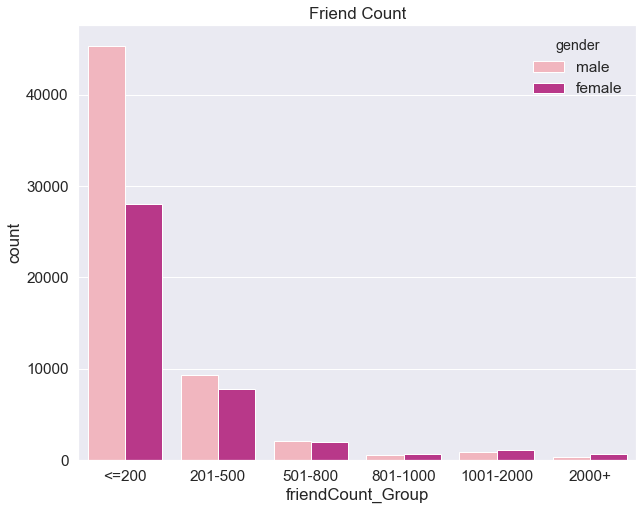

In [7]:
facebook_df['friendCount_Group'] = pd.cut(facebook_df['friend_count'].dropna(),                        # Lets create six groups in "friendCount_Group" for "friend_count"
                         [0,200,500,800,1000,2000,100000],
                         labels=['<=200','201-500','501-800','801-1000','1001-2000','2000+'], include_lowest=True)

fig1,ax =plt.subplots(figsize=(10,8))
sns.countplot(data = facebook_df, x = 'friendCount_Group', hue='gender', palette='RdPu')               # plot of friend_count in friendCount_Group and gender
plt.title('Friend Count')

Text(0.5, 1.0, 'Friendships')

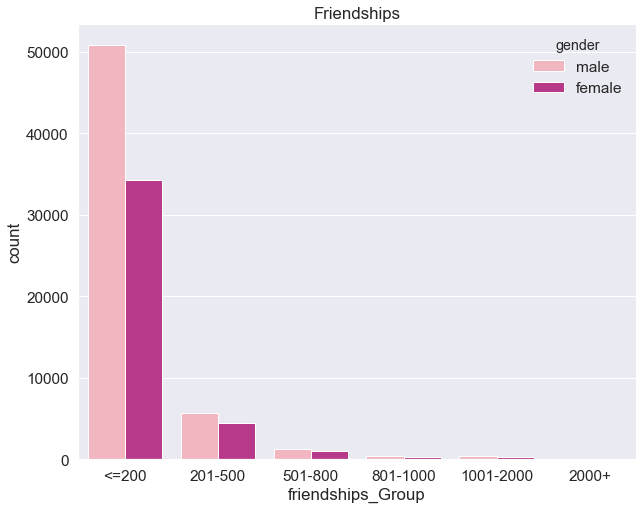

In [8]:
facebook_df['friendships_Group'] = pd.cut(facebook_df['friendships_initiated'].dropna(),                        # Lets create seven groups in "friendships_Group" of "friendships_initiated"
                         [0,200,500,800,1000,2000,100000],
                         labels=['<=200','201-500','501-800','801-1000','1001-2000','2000+'], include_lowest=True)

fig2,ax =plt.subplots(figsize=(10,8))                                                                          # plot of friendships_initiated in friendships_Group and gender
sns.countplot(data = facebook_df, x = 'friendships_Group', hue='gender', palette='RdPu') 
plt.title('Friendships')

In [9]:
facebook1_df = pd.pivot_table(facebook_df,values='friend_count',index='age',columns='friendCount_Group')          # Let's pivot friend_count in age, friendCount_Group
facebook1_df.head(10)                                                                                    # .head(10) for first 10 rows
facebook1_df.tail(10)                                                                                    # .tail(10) for last 10 rows # aggfunc by default numpy.mean

friendCount_Group,<=200,201-500,501-800,801-1000,1001-2000,2000+
age,,,,,,
104,93.677419,321.000000,645.538462,873.000000,1374.000000,2043.000000
105,102.138889,322.761905,675.437500,883.750000,1270.000000,4548.000000
106,106.878788,315.194444,608.166667,905.000000,1325.600000,2160.000000
107,83.404255,341.937500,656.181818,868.800000,1128.000000,4016.000000
108,92.425316,323.184557,628.359116,905.890909,1386.887324,3232.090909
109,95.666667,327.333333,NaN,NaN,NaN,NaN
110,84.833333,331.600000,666.333333,885.000000,NaN,NaN
111,89.363636,305.500000,602.500000,914.000000,NaN,NaN
112,71.727273,301.750000,NaN,802.000000,1621.000000,4310.000000


In [10]:
facebook1_df.describe()                                 # let's describe facebookch_df

friendCount_Group,<=200,201-500,501-800,801-1000,1001-2000,2000+
count,101.000000,101.000000,98.000000,89.000000,94.000000,88.000000
mean,69.300337,306.284485,622.912209,892.111575,1344.313423,3200.611628
std,14.886361,15.284990,29.761790,31.374719,117.140709,646.073965
min,51.027027,268.869565,513.000000,802.000000,1069.000000,2028.000000
25%,58.242445,295.186916,604.877381,874.000000,1266.275000,2805.845238
50%,62.937659,305.500000,625.404353,894.166667,1350.680380,3158.764925
75%,76.431818,315.663057,638.642105,911.000000,1417.898810,3622.750000
max,106.878788,344.678571,695.500000,969.000000,1679.000000,4720.000000


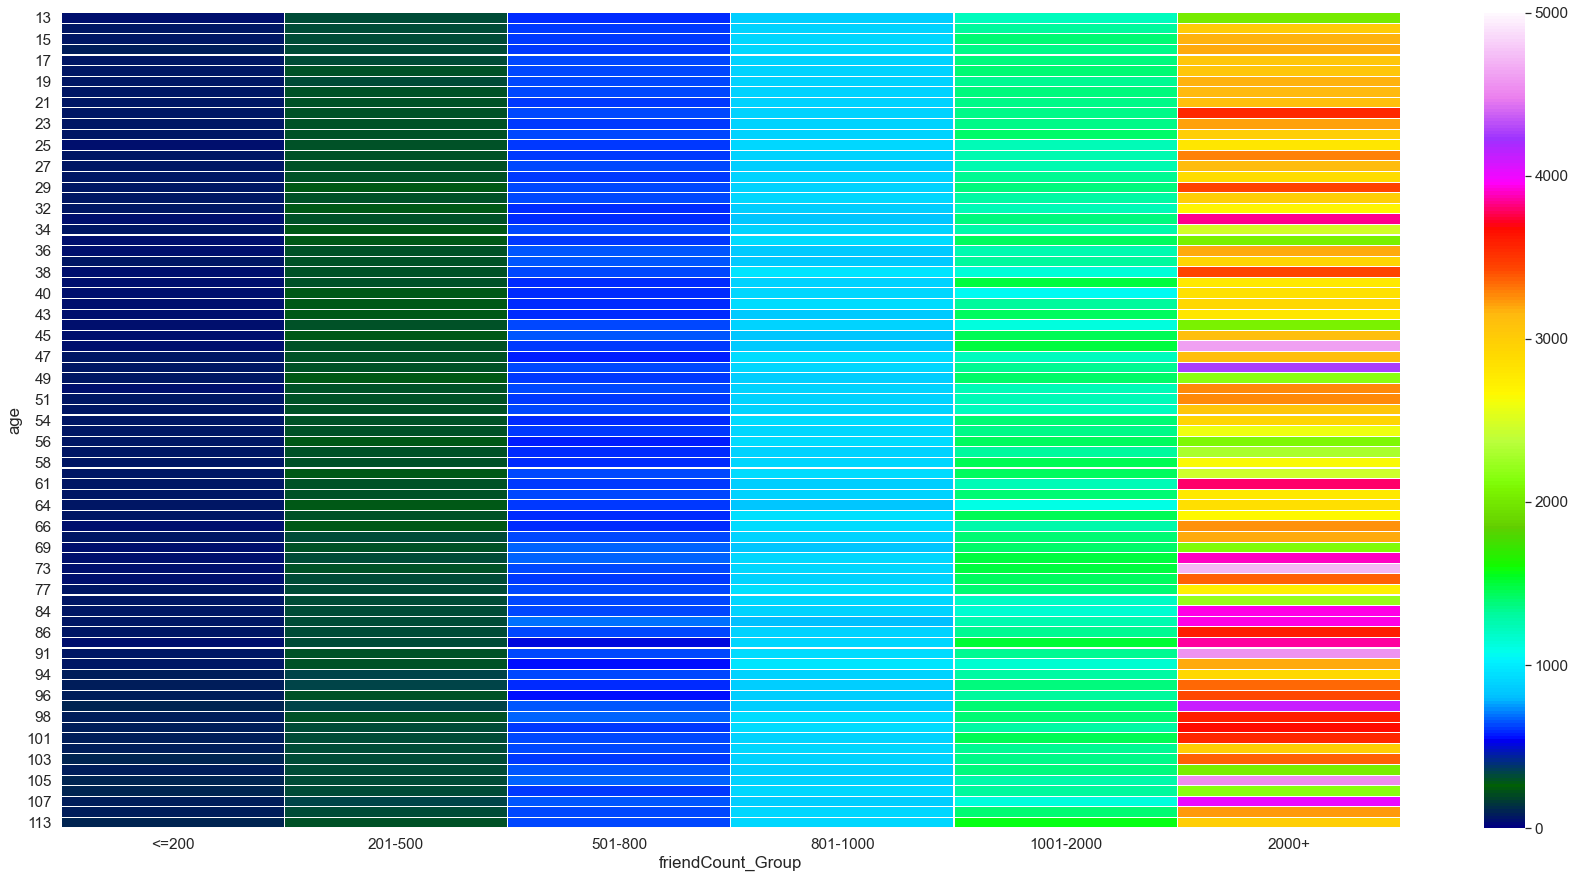

In [11]:
fig_heat=plt.gcf()         #(figsize=(30,15))                              # Let's plot heatmap for facebookch_df and dropna()
fig_heat.set_size_inches(30,15)
sns.heatmap(facebook1_df.dropna(),robust=True, cmap="gist_ncar", vmin=0, vmax=5000,linewidth=0.1)
plt.show()

In [12]:
facebook_df['percentile_rank_FC']= facebook_df['friend_count'].rank(pct=False)                  # Let's add percetile_rank_FC and percentile_FC columns
facebook_df['percentile_FC']= facebook_df['friend_count'].rank(pct=True)
facebook_df['percentile_rank_LR']= facebook_df['likes_received'].rank(pct=False)                  # Let's add percetile_rank_LR and percentile_LR columns
facebook_df['percentile_LR']= facebook_df['likes_received'].rank(pct=True)


facebook_df.sample(10)                                                                   # sample of 10 rows of facebook_df dataset

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friendCount_Group,friendships_Group,percentile_rank_FC,percentile_FC,percentile_rank_LR,percentile_LR
85608,1459455,17,21,1996,9,female,259.0,350,314,52,153,44,70,8,83,201-500,201-500,85704.5,0.865676,84651.0,0.855035
23334,1458635,33,21,1980,9,female,13.0,29,27,0,0,0,0,0,0,<=200,<=200,23489.0,0.237255,12214.5,0.123375
43968,2000150,58,3,1955,2,female,1592.0,67,34,40,0,40,0,0,0,<=200,<=200,43603.5,0.440426,12214.5,0.123375
7059,1441324,61,20,1952,9,male,285.0,5,2,3,0,0,0,3,0,<=200,<=200,6899.0,0.069685,12214.5,0.123375
81957,1225839,46,8,1967,8,male,350.0,277,52,421,21,421,18,0,3,201-500,<=200,81292.5,0.821111,61192.0,0.618082
35880,1067064,41,11,1972,8,male,1982.0,50,19,6,3,0,2,6,1,<=200,<=200,35704.5,0.360641,37948.0,0.383302
56827,2152286,61,30,1952,4,female,413.0,107,66,30,0,30,0,0,0,<=200,<=200,57009.0,0.575831,12214.5,0.123375
85941,1033659,20,6,1993,6,female,848.0,357,151,386,377,327,174,59,203,201-500,<=200,86048.0,0.869145,91809.0,0.927336
52115,1558181,17,16,1996,8,female,317.0,89,37,180,7,180,6,0,1,<=200,<=200,51784.5,0.523060,47376.5,0.478536
64313,1766723,26,23,1987,3,female,525.0,140,65,0,1,0,1,0,0,<=200,<=200,64315.5,0.649632,28081.0,0.283638


In [13]:
facebook_df.sort_values(['percentile_rank_FC'], ascending=False).head(5)               # sort_values on pecentile_rank_FC

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friendCount_Group,friendships_Group,percentile_rank_FC,percentile_FC,percentile_rank_LR,percentile_LR
98159,2090699,103,1,1910,10,female,783.0,4923,96,26,80,26,71,0,9,2000+,<=200,99003.0,1.00000,77920.5,0.787052
98026,1660276,66,1,1947,7,male,716.0,4917,431,0,114,0,69,0,45,2000+,201-500,99002.0,0.99999,81730.5,0.825536
98184,1926655,19,1,1994,8,female,469.0,4863,241,37,166,36,117,1,49,2000+,201-500,99001.0,0.99998,85443.0,0.863034
98797,1685573,38,20,1975,2,male,1930.0,4845,942,1768,4886,1208,1619,560,3267,2000+,801-1000,99000.0,0.99997,98720.0,0.997142
98087,1386477,61,30,1952,3,male,1210.0,4844,561,7,247,5,96,2,151,2000+,501-800,98999.0,0.99996,88740.5,0.896342


In [14]:
facebook_df.sort_values(['percentile_rank_LR'], ascending=False).head(5)                   # sort_values on pecentile_rank_LR

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friendCount_Group,friendships_Group,percentile_rank_FC,percentile_FC,percentile_rank_LR,percentile_LR
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,801-1000,201-500,94918.5,0.958744,99003.0,1.00000
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,201-500,<=200,77082.5,0.778588,99002.0,0.99999
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,2000+,501-800,98797.0,0.997919,99001.0,0.99998
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,1001-2000,201-500,98080.0,0.990677,99000.0,0.99997
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,2000+,801-1000,98856.5,0.998520,98999.0,0.99996


In [68]:
#facebook_df.to_excel('Facebook_p1.xlsx', sheet_name='FB_data')                          # facebook_df dataset export to  excel_sheet

In [25]:
output = widgets.Output()                                                               # Let's create dashboard with widgets
plot_output1 = widgets.Output()
plot_output2 = widgets.Output()
plot_output3 = widgets.Output()
plot_output4 = widgets.Output()
plot_output5 = widgets.Output()

dropdown_age = widgets.Dropdown(options =  unique_sorted_values_plus_ALL(facebook_df.age), description = 'Age:')  # dropdown age options
dropdown_gender = widgets.Dropdown(options = unique_values_plus_ALL(facebook_df.gender), description = 'Gender:') # dropdown gender options
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description ='Number:')              # bounded_num of widget

def common_filtering(age, gender, num):                                 # common_filtering (conditional)
    output.clear_output()
    plot_output1.clear_output()
    plot_output2.clear_output()
    plot_output3.clear_output()
    plot_output4.clear_output()
    plot_output5.clear_output()
    
    if (age==ALL) & (gender==ALL):
        common_filter = facebook_df
    elif (age==ALL):
        common_filter = facebook_df[facebook_df.gender == gender]
    elif (gender==ALL):
        common_filter = facebook_df[facebook_df.age == age]
    else:
        common_filter = facebook_df[(facebook_df.age == age) & (facebook_df.gender == gender)]
        
        
    with output:                                                               # data ouput and highlight points with lambda function
        display(common_filter.style.applymap(lambda x: colour_ge_value(x, 1000), subset=['likes', 'likes_received']))
    
    with plot_output1:                                                         # plotting kde plot, scatterplot and countplot
        plt.figure(figsize=(8,5))
        sns.kdeplot(common_filter['likes'], shade=True)
        sns.kdeplot(common_filter['likes_received'], shade=True)
        plt.show()
        
    with plot_output2:
        plt.figure(figsize=(8,5))
        sns.kdeplot(common_filter['mobile_likes'], shade=True)
        sns.kdeplot(common_filter['www_likes'], shade=True)
        plt.show()
        
    with plot_output3:    
        plt.figure(figsize=(8,5))
        sns.kdeplot(common_filter['mobile_likes_received'], shade=True)
        sns.kdeplot(common_filter['www_likes_received'], shade=True)
        plt.show()
        
    with plot_output4:
        plt.figure(figsize=(12,6))
        sns.scatterplot(data=common_filter, x=common_filter['tenure'].dropna(), y=common_filter['friend_count'], hue='friendCount_Group', palette='pastel')
        plt.show()
        

    with plot_output5:
        plt.figure(figsize=(12,6))
        sns.countplot('friendCount_Group',data = common_filter,order = common_filter['friendCount_Group'].value_counts().index, palette="pastel")          
        plt.title("Friend Counts",fontsize=18,fontweight="bold")
        plt.show()
        
def dropdown_age_eventhandler(change):                                       # let's add eventhandler's of gender, age and bounded_num
    common_filtering(change.new, dropdown_gender.value, bounded_num.value)

def dropdown_gender_eventhandler(change):
    common_filtering(dropdown_age.value, change.new, bounded_num.value)

def bounded_num_eventhandler(change):
    common_filtering(dropdown_age.value, dropdown_gender.value, change.new)


dropdown_age.observe(dropdown_age_eventhandler, names='value')              # dropdown options of widgets_observe
dropdown_gender.observe(dropdown_gender_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

# DASHBOARD
item_layout = widgets.Layout(margin='0 0 50px 0')                             

input_widgets = widgets.HBox([dropdown_age, dropdown_gender, bounded_num])
#display(input_widgets)

tab = widgets.Tab([output, plot_output1, plot_output2, plot_output3, plot_output4, plot_output5])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Total-likes/likes received')
tab.set_title(2, 'Mobile/WWW-likes')
tab.set_title(3, 'Mobile/WWW-likes received')
tab.set_title(4, 'Tenure')
tab.set_title(5, 'Friend Count')

#display(tab)

dashboard = widgets.VBox([input_widgets, tab])
display(dashboard)

In [19]:
print("nan count:",pd.isnull(facebook_df['tenure']).sum())               # NaN count in tenure

nan count: 2


In [20]:
print("Count of distinct responses for Gender:", len(set(facebook_df['gender'])))      # Learn more about the variable Gender, which appears not to be standardized with 3 distinct responses.
print("Distinct responses for Gender:", set(facebook_df['gender']))  
print("nan count:",pd.isnull(facebook_df['gender']).sum())

Count of distinct responses for Gender: 3
Distinct responses for Gender: {'female', nan, 'male'}
nan count: 175


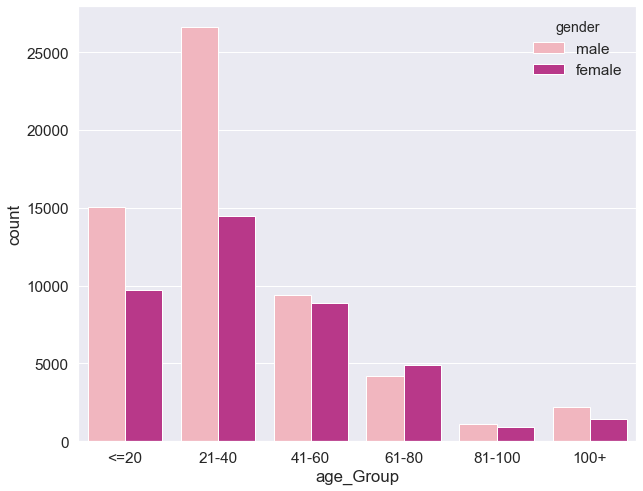

In [21]:
facebook_df['age_Group'] = pd.cut(facebook_df['age'].dropna(),                     # Lets create  five "age_Groups" of "age"
                         [0,20,40,60,80,100,120],
                         labels=['<=20','21-40','41-60','61-80','81-100','100+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(10,8))                                              # countplot for users in each age_group & gender
sns.countplot(data = facebook_df, x = 'age_Group', hue='gender', palette='RdPu')
#plt.title('Age Group viz gender')
plt.show()

In [22]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 99003 non-null  int64   
 1   age                    99003 non-null  int64   
 2   dob_day                99003 non-null  int64   
 3   dob_year               99003 non-null  int64   
 4   dob_month              99003 non-null  int64   
 5   gender                 98828 non-null  object  
 6   tenure                 99001 non-null  float64 
 7   friend_count           99003 non-null  int64   
 8   friendships_initiated  99003 non-null  int64   
 9   likes                  99003 non-null  int64   
 10  likes_received         99003 non-null  int64   
 11  mobile_likes           99003 non-null  int64   
 12  mobile_likes_received  99003 non-null  int64   
 13  www_likes              99003 non-null  int64   
 14  www_likes_received     99003 non-null 

Text(0, 0.5, 'tenure')

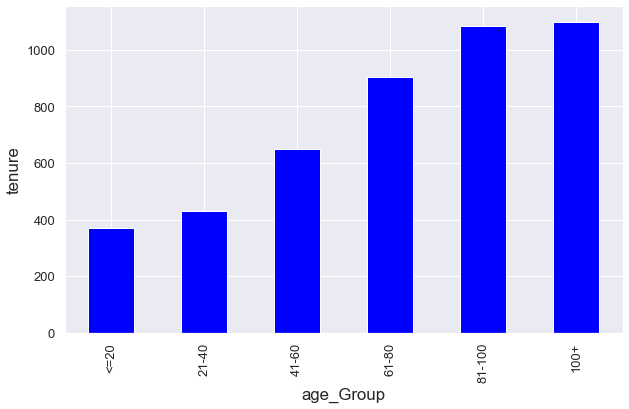

In [23]:
facebook_df.groupby(['age_Group'])['tenure'].mean().sort_values().plot(kind='bar', figsize=(10,6), fontsize=13, color='blue')
plt.ylabel('tenure')                                        # barplot for meanvalue of tenure to age_Groups

Text(0, 0.5, 'friend_count')

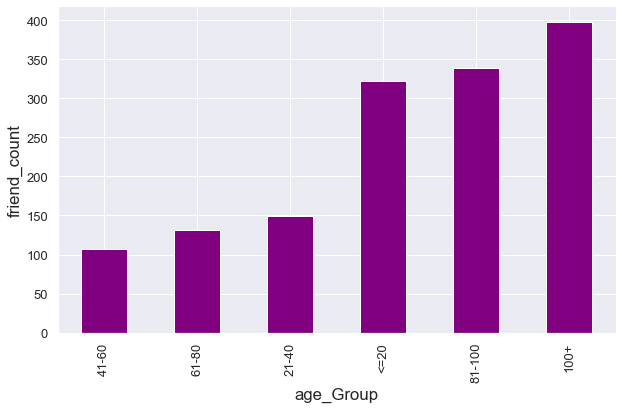

In [24]:
facebook_df.groupby(['age_Group'])['friend_count'].mean().sort_values().plot(kind='bar', figsize=(10,6), fontsize=13, color='purple')
plt.ylabel('friend_count')                                            # barplot for friend_count to age_Groups

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

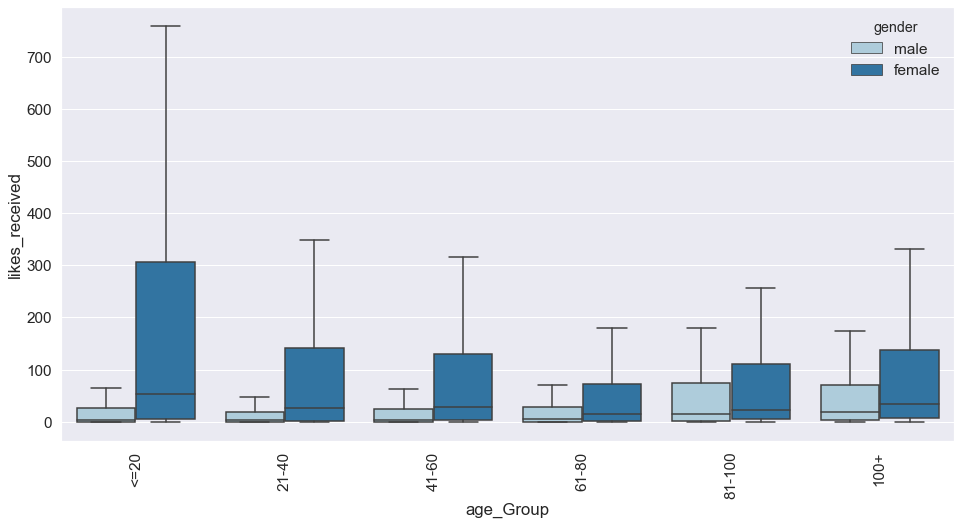

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=facebook_df, x='age_Group', y='likes_received', hue='gender', showfliers=False, palette='Paired', width=0.8)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

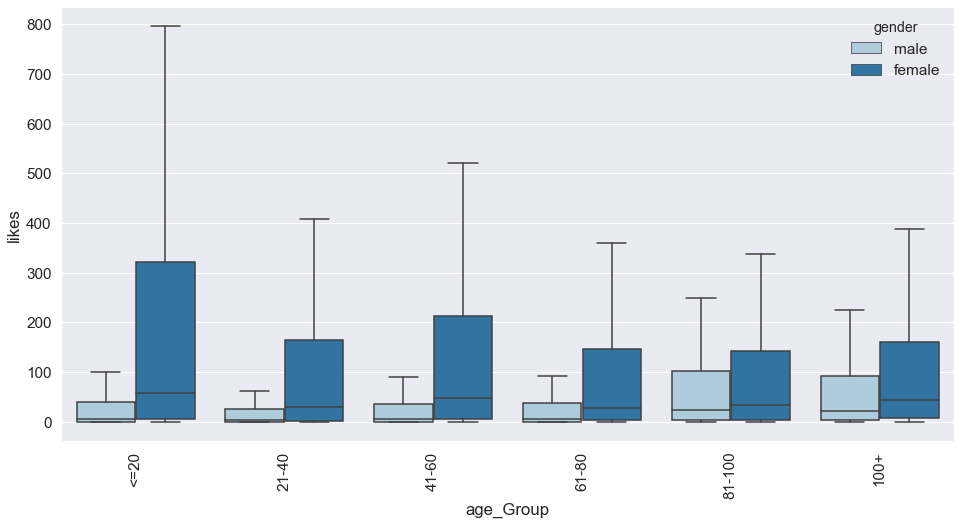

In [26]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=facebook_df, x='age_Group', y='likes',hue='gender', showfliers=False, palette='Paired', width=0.8)
plt.xticks(rotation=90)

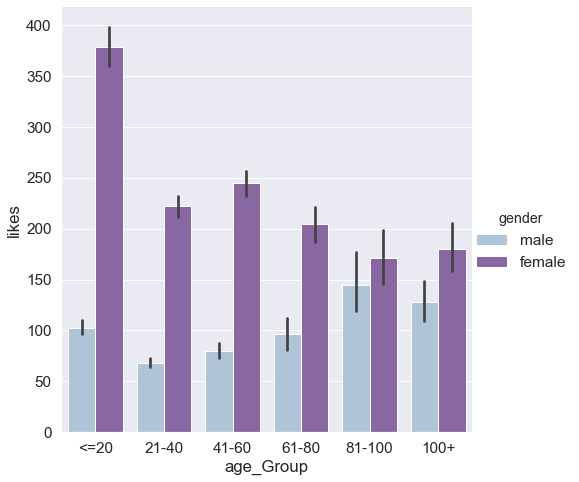

In [27]:
sns.catplot(x='age_Group', y='likes', hue='gender', data=facebook_df , height=7, kind='bar', palette='BuPu')

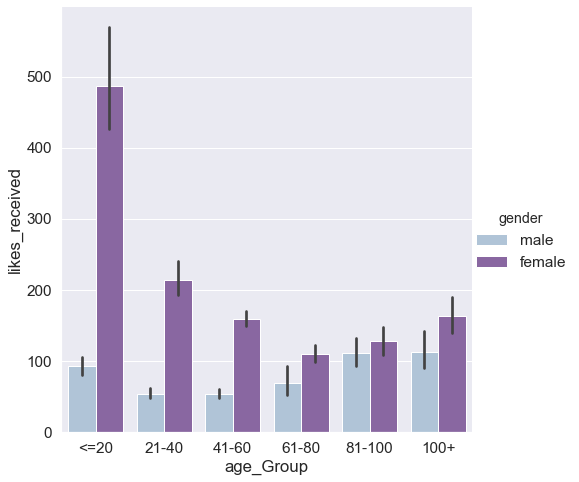

In [28]:
sns.catplot(x='age_Group', y='likes_received', hue='gender', data=facebook_df , height=7, kind='bar', palette='BuPu')

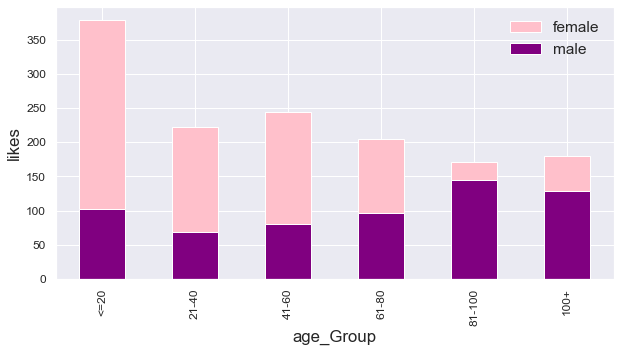

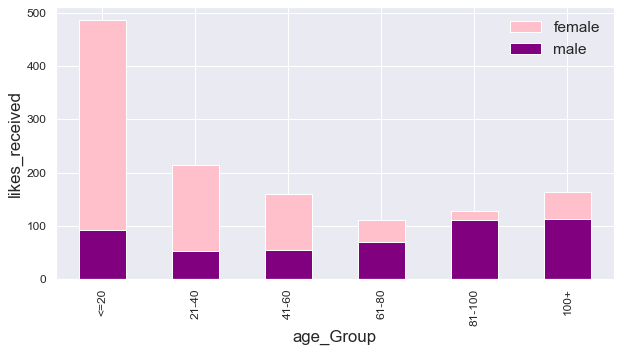

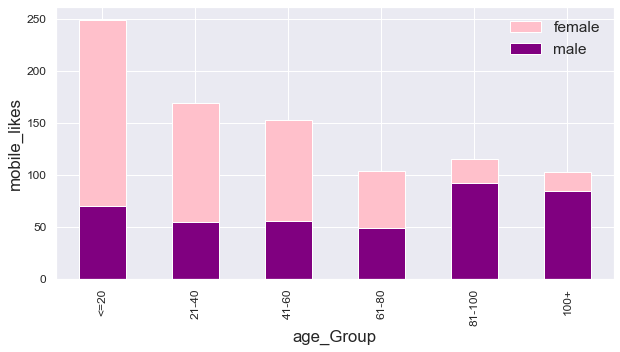

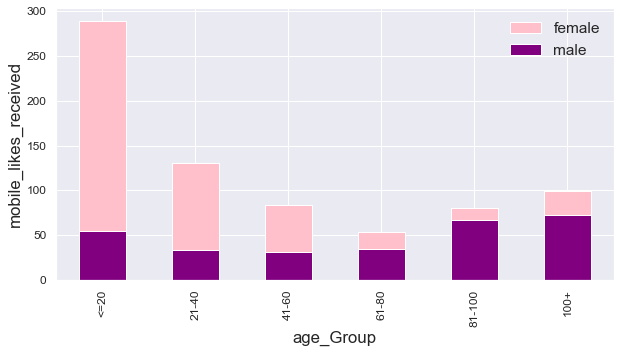

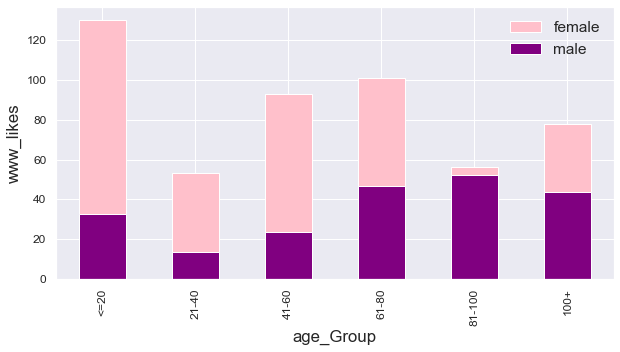

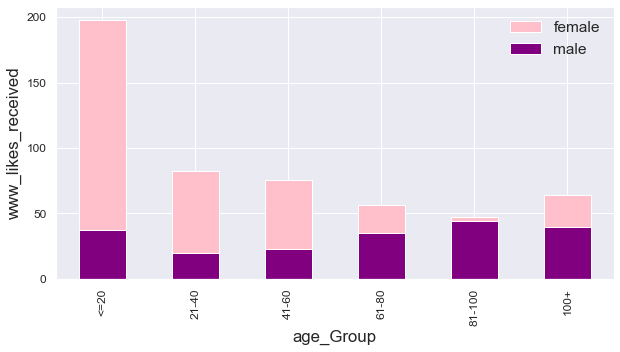

In [41]:
likes_info = ['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']


for value in likes_info:                                                # barplot for mean value of likes_info with age_Groups
    plt.figure(figsize=(10,5))
    facebook_df[facebook_df['gender'] == 'female'].groupby(['age_Group'])[value].mean().plot(kind='bar', color='pink', )
    facebook_df[facebook_df['gender'] == 'male'].groupby(['age_Group'])[value].mean().plot(kind='bar', color='purple', fontsize=12)
    plt.ylabel(value)
    plt.legend(['female', 'male'])

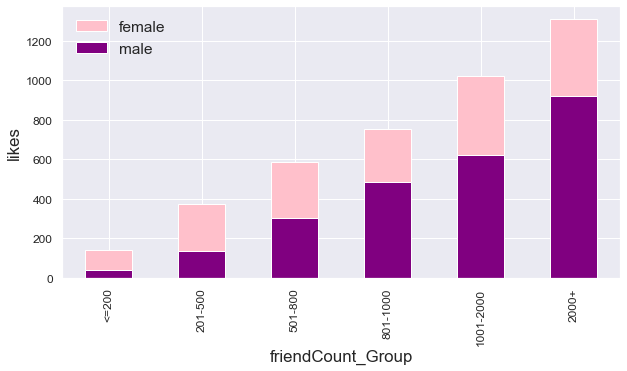

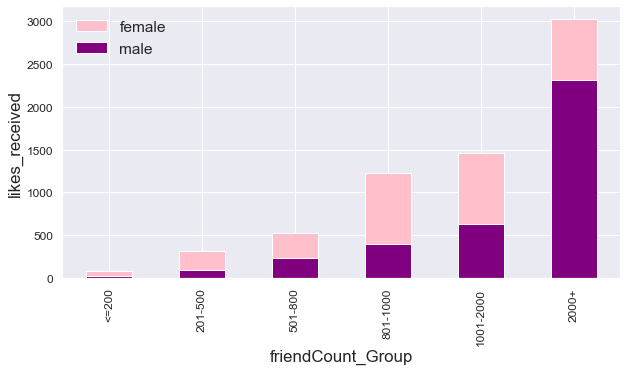

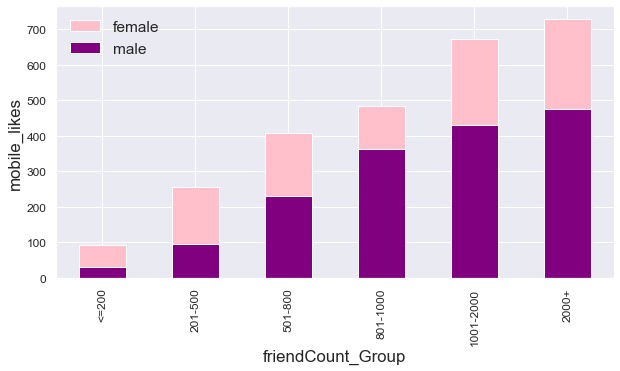

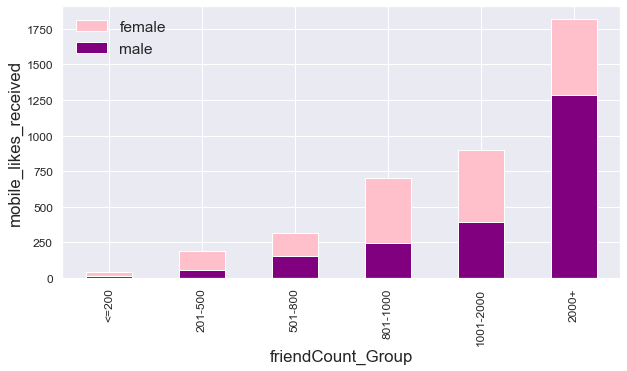

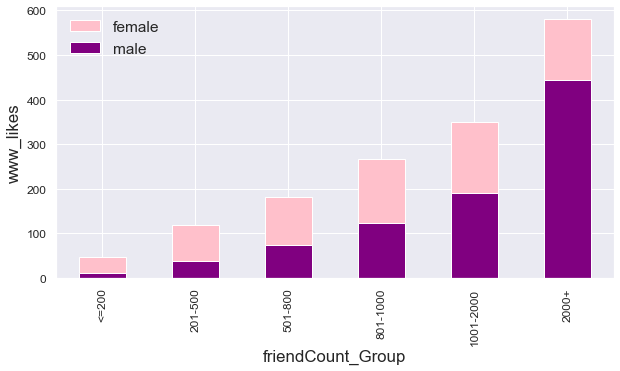

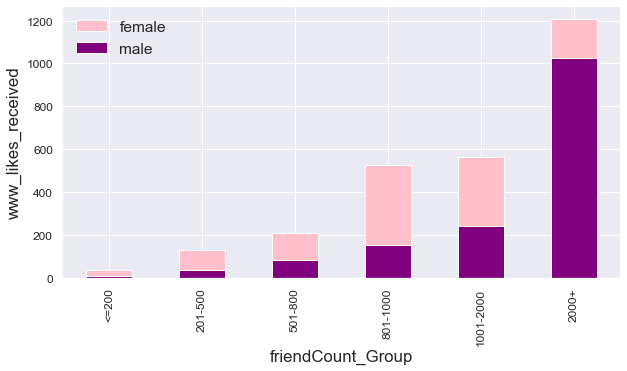

In [42]:
for value in likes_info:
    plt.figure(figsize=(10,5))
    facebook_df[facebook_df['gender'] == 'female'].groupby(['friendCount_Group'])[value].mean().plot(kind='bar', color='pink', )
    facebook_df[facebook_df['gender'] == 'male'].groupby(['friendCount_Group'])[value].mean().plot(kind='bar', color='purple', fontsize=12)
    plt.ylabel(value)
    plt.legend(['female', 'male'])                               # barplot for mean value of likes_info with friendCount_Groups


## Conclusion:-

- Facebook Dataset has 99003 users data with their unique userid. Data has many users of different **ages between 13 to 113.     and also they have DOB between year 1900 to 2000. i.e. 100 yrs.** (We can see information of any particular age through dashboard presented in notebook.)

- As per age_Group created [0-20, 21-40, 41-60, 61-80, 81-100, 100+], available user's data has **nearly 28000 male and 14000     female fields of (21-40) age_Group;** and all other age groups have less than 15000 users for male & female each.

- Male have **total frequency of 58574 whereas, female have total 40254.** and there are 175 NaN values for gender of user's     data.

- Tenure of users can be observed from **min 0 to max 3139 days.** and there are 2 NaN values for no. of days of users.

- Friend count of users can be observed from **min 0 to max 4923 counts.**

- As per FriendCount_Group created [<200, 201-500, 501-800, 801-1000, 1001-2000, 2000+], available user's data has **nearly       46000 male and 28000 female fields of (<200) friendcount;** and all other friendCount groups have less than 1000 users for     male & female each.  

- Friendships initiated by users can be observed  from **min 0 to max 4144 counts.**

- As per Friendships_Group created [<200, 201-500, 501-800, 801-1000, 1001-2000, 2000+], available user's data has **nearly     51000 male and 34000 female fields of <200 friendships initiated;** and all other friendships groups have less than 500 users for male & female each.

- Likes shared by users can be seen **between min 0 to max 25111.**
 - Mobile_Likes **between min 0 to max 25111.**
 - WWW_likes **between min 0 to max 14865.**
 
- Likes received by users can be seen **between min 0 to max 261197.**
 - Mobile_Likes_Received **between min 0 to max 138561.**
 - WWW_Likes_Received **between min 0 to max 129953.**
 
- **Userid 2090699 (female, age(103), DOB - 1st October, 1910) has highest (4923) friend count in just 783 days.** But with other information, it seems that a aged woman is not any further involved in facebook activities. (Friendships initiated = 96, Total_likes = 26, Total_likes_received = 80 and tenure = 783 days).

- Other among the top five by friend counts have ages 60, 19, 38 and 61 (near 4900 friends) in respect.

- **Userid 1674584 (female, age (17), DOB - 14th august, 1996) has highest (261197) likes_received.** (friend count = 818 & tenure = 401 days).

- Other among the top five by likes_received have ages 20, 23, 20, 23 in respect.

## Mean value comparison 

- As per age_Group created, mean value of tenure is between 380 to 1200 days and its highest for 100+ group and lowest for <20 group whereas mean value of friend count is between 110 to 400 counts and its highest for 100+ group and lowest for 41-60 group.

- It can be observed that, for any age_Group created female has received more likes and shared more likes than male. It can be inferred that female of all age groups seems to be more active on social networking. 

- We can get clear picture by comparing likes_information from aforementioned charts for all age_Groups and all friendCount_Group as well.


## Thanks!!